# Mandana Samiei
Student ID: 260779555

# Q4, Q5 and Q6  (Mixure of 3 Guassians)

# Load Data

In [1]:
import numpy as np 
from numpy import genfromtxt
import matplotlib
import matplotlib.pyplot as plt
import csv
import math
from numpy.linalg import inv
%matplotlib inline  

def load_mean(file_name):
    my_data = genfromtxt(file_name, delimiter=',')
    mean = my_data[:20]
    return mean
def load_cov(file_name):
    my_data = genfromtxt(file_name, delimiter = ',')
    cov = my_data[:,:20]
    return cov
def load_data(file_name):
    my_data = genfromtxt(file_name, delimiter = ',')
    return my_data

# Data Manipulation

In [2]:
def generate_data(c1_m1, c1_m2, c1_m3, cov1, cov2, cov3 ,num=2000): 
    cat_cmp_num = np.random.multinomial(num, [0.10, 0.42, 0.48]) # Categorical Components numbers   
    x1 = np.random.multivariate_normal(c1_m1,cov1,cat_cmp_num[0]) 
    x2 = np.random.multivariate_normal(c1_m2,cov2,cat_cmp_num[1])  
    x3 = np.random.multivariate_normal(c1_m3,cov3,cat_cmp_num[2]) 
    c_x = np.append(np.append(x1, x2, axis=0),x3, axis=0)
    return c_x
def divide_data(d0,d1):
    rand_num0 =  np.random.permutation(d0.shape[0])
    test_0 = d0[rand_num0[:600]]
    train_0 = d0[rand_num0[600:]]
    rand_num1 =  np.random.permutation(d1.shape[0])
    test_1 = d1[rand_num1[:600]]
    train_1 = d1[rand_num1[600:]]
    test_data = np.concatenate((test_0,test_1),axis=0)
    train_data = np.concatenate((train_0,train_1),axis=0) 
    return test_data, train_data
def shuffle_data(x):
    np.random.shuffle(x)
    return x
def label_data(x0,x1): # add -1 as a label for negative classes and +1 as label for poseive classes 
    y0 = np.zeros((2000,1))
    y1 = np.ones((2000,1))
    d0 = np.concatenate((x0,(y0-1)),axis=1) #2000*21
    d1 = np.concatenate((x1,y1),axis=1)
    return d0,d1

# Save Data in file

In [3]:
def save_data(train, test):
    np.savetxt("DS2.csv" , test, fmt='%15s', delimiter=',')
    np.savetxt("DS2_train.csv", train, fmt='%15s', delimiter=',') 

# Linear discriminant Analysis (LDA)

In [4]:
def LDA_parameters(x_c1, x_c2):
    N1 = x_c1.shape[0] # Number of Negative examples
    N2 = x_c2.shape[0] # Number of Posetive examples
    total_samples = N1 + N2
    # Learn P(c1) and P(c2)
    p_c1  = float(N1)/total_samples#fraction of points in c1 over total number of points 
    p_c2  = float(N2)/total_samples#fraction of points in c2 over total number of points
    # Learn Mu1 and Mu2
    Mu1 = x_c1[:,:].mean(axis=0)
    Mu2 = x_c2[:,:].mean(axis=0)
    # learn covariance
    S1 = np.dot((x_c1[:,:] - Mu1).T,(x_c1[:,:] - Mu1))/N1
    S2 = np.dot(((x_c2[:,:] - Mu2).T),(x_c2[:,:] - Mu2))/N2
    cov = p_c1*S1 + p_c2*S2
    return Mu1, Mu2, cov, p_c1, p_c2
def LDA_model(mu1, mu2, cov, p_c1, p_c2):
    b = inv(cov)
    w = np.dot(b,(mu1-mu2))
    w0 = -(np.dot((mu1.T),np.dot(b,mu1)))/2. + (np.dot((mu2.T),np.dot(b,mu2)))/2. + np.log(p_c1/float(p_c2))
    return w,w0
def LDA_prediction(w,w0,x):
    a = np.dot(x,(w.T)) + w0 
    y = 1./ (1. + np.exp(-a)) # y = sigmoid(a)
    for i in range(y.shape[0]):
        if y[i] > 0.5:
            y[i] = 1.0
        else: 
            y[i] = -1.0
    return y

# KNN Algorithm 

In [5]:
def KNN(train_set, test_set, k):
    labels = np.zeros(test_set.shape[0])
    for i in range(test_set.shape[0]):
        distances = np.linalg.norm(train_set[:,:20] - test_set[i,:20][None,:],axis=1)
        neighbours = distances.argsort()[:k]
        if train_set[neighbours,20].sum() > 0.0:
            labels[i] = +1
        else:
            labels[i] = -1
    return labels

# Evaluation Metrics

In [6]:
def get_accuracy(test_set, prediction):
    correct = 0
    for i in range(test_set.shape[0]):
        if (test_set[i] == prediction[i]):
            correct += 1;
    accuracy = (correct / float(test_set.shape[0]))* 100.0
    return accuracy
def get_precision(test_set, prediction):
    TP,_,FP,_ = get_confusion_mat(test_set, prediction)
    precision = float(TP) / (TP+FP)
    return precision* 100.0
def get_recall(test_set, prediction):
    TP,_,_,FN = get_confusion_mat(test_set, prediction)
    recall = float(TP) / (TP+FN)
    return recall* 100.0
def get_Fmeasure(pr, rc):
    return 2*(pr*rc)/float(pr+rc)
def get_confusion_mat(test_set, prediction):
    TP, TN, FN, FP = 0, 0, 0, 0
    for i in range(test_set.shape[0]):
        if test_set[i] == prediction[i] and prediction[i] == 1.0: # True Posetive
            TP +=1
        elif test_set[i] == prediction[i] and prediction[i] == -1.0: # True Negative
            TN +=1 
        elif test_set[i] != prediction[i] and prediction[i] == -1.0: # False Negative
            FN +=1
        elif test_set[i] != prediction[i] and prediction[i] == 1.0: # False Posetive
            FP +=1
    return TP, TN, FP, FN


# Visualization

In [12]:
def visualize_metrics(train_data, test_data):
    accuracy_, precision_, recall_, f1_measure_ = [], [], [], []
    conf_mat = [[],[]]
    for k in range(1,200,2):
        test_labels_predicted = KNN(train_data, test_data, k)
        accuracy = get_accuracy(test_data[:,20],test_labels_predicted)
        precision = get_precision(test_data[:,20],test_labels_predicted)
        recall = get_recall(test_data[:,20],test_labels_predicted)
        f1_measure = get_Fmeasure(precision, recall)
        TP, TN, FP, FN = get_confusion_mat(test_data[:,20], test_labels_predicted)
        conf_mat[0] = [TP, FP]
        conf_mat[1] = [FN, TN]
        print "\n__ K = {}  ___ Confusion matrix = {}" .format(k, conf_mat)
        print "\nAccuracy: {}%" .format(accuracy)
        print "Precision: {}%" .format(precision)
        print "Recall: {}%" .format(recall)
        print "F1_measure: {}%" .format(f1_measure)
        accuracy_.append(accuracy)
        precision_.append(precision)
        recall_.append(recall)
        f1_measure_.append(f1_measure)
    fig, ax = plt.subplots(1, figsize=(10,6))
    plt.plot(range(1,200,2), accuracy_, c='#FFA500',label = "accuracy")
    plt.plot(range(1,200,2), precision_, c='b',label = "precision")
    plt.plot(range(1,200,2), recall_, c='c',label = "recall")
    plt.plot(range(1,200,2), f1_measure_, c='r',label = "f1_measure")
    plt.ylabel('Metrics %')
    plt.xlabel('K')
    plt.legend(loc='best', shadow=True)
    plt.title('Metrics Evaluation using different values of K')
    plt.show()
    max_acc, max_pre, max_rec, max_f1 = max(accuracy_), max(precision_), max(recall_), max(f1_measure_)
    print "\nMaximum Accuracy: {}  with k = {}"  .format(max_acc, accuracy_.index(max_acc)*2+1)
    print "\nMaximum Precision: {}  with k = {}"  .format(max_pre, precision_.index(max_pre)*2+1)
    print "\nMaximum Recall: {}  with k = {}"  .format(max_rec, recall_.index(max_rec)*2+1)
    print "\nMaximum F1 Measure: {}  with k = {}"  .format(max_f1, f1_measure_.index(max_f1)*2+1)
def visualize_error_rate(train_data, test_data):
    test_error_rates = []
    train_error_rates = []
    for k in range(1,200,2):
        test_labels_predicted = KNN(train_data, test_data, k)
        test_error_rates.append(float((test_labels_predicted != test_data[:,20]).sum()) / test_labels_predicted.shape[0])
        train_labels_predicted = KNN(train_data, train_data, k)
        train_error_rates.append(float((train_labels_predicted != train_data[:,20]).sum()) / train_labels_predicted.shape[0])
    fig, ax = plt.subplots(1, figsize=(10,6))    
    ax.plot(range(1,200,2), train_error_rates, c='r',label = "Train Error Rate")
    ax.plot(range(1,200,2), test_error_rates, c='b',label = "test Error Rate")
    plt.ylabel('Error Rates')
    plt.xlabel('K')
    plt.legend(loc='best', shadow=True)
    plt.title('Train and Test error rate over different values of K')
    plt.show()
    min_error = min(test_error_rates)
    print "\nMinimum Test Error rate: {}  with k = {}\n"  .format(min_error, test_error_rates.index(min_error)*2+1)
    

Main Function

_____________________________ calculating LDA parameters________________________________
Mu1 = 
[ 1.01786495  1.05411409  1.02142793  1.01212929  1.00765915  1.03213929
  1.02684248  1.04021126  0.99994681  1.00003177  0.98940491  1.05475403
  0.9957439   1.0616549   1.02401207  1.04682872  1.08595201  1.01774778
  0.99453334  1.10056015]
Mu2 = 
[ 1.17945095  1.22035529  1.18820594  1.21071647  1.21525255  1.21448164
  1.19642934  1.15435364  1.19161321  1.22548902  1.20413989  1.1856153
  1.18598249  1.13774618  1.14466351  1.1849598   1.1428134   1.17115485
  1.24648184  1.17760349]
Covariance = 
[[ 7.7389643   5.40098303  4.6039267   5.0189307   4.2716914   5.63367952
   5.85180602  5.63660494  4.67436959  5.17411766  5.47618529  4.83598569
   5.01539254  6.04547914  5.21896058  5.64388466  5.29251983  5.4836747
   5.48350989  5.81268821]
 [ 5.40098303  7.29693501  4.89599335  5.21557786  4.94197426  6.01103291
   6.49384645  5.44511173  4.63853882  5.09241424  4.85946515  4.9773738


__ K = 23  ___ Confusion matrix = [[315, 254], [285, 346]]

Accuracy: 55.0833333333%
Precision: 55.3602811951%
Recall: 52.5%
F1_measure: 53.8922155689%

__ K = 25  ___ Confusion matrix = [[322, 245], [278, 355]]

Accuracy: 56.4166666667%
Precision: 56.7901234568%
Recall: 53.6666666667%
F1_measure: 55.1842330763%

__ K = 27  ___ Confusion matrix = [[317, 248], [283, 352]]

Accuracy: 55.75%
Precision: 56.1061946903%
Recall: 52.8333333333%
F1_measure: 54.4206008584%

__ K = 29  ___ Confusion matrix = [[315, 249], [285, 351]]

Accuracy: 55.5%
Precision: 55.8510638298%
Recall: 52.5%
F1_measure: 54.1237113402%

__ K = 31  ___ Confusion matrix = [[325, 245], [275, 355]]

Accuracy: 56.6666666667%
Precision: 57.0175438596%
Recall: 54.1666666667%
F1_measure: 55.5555555556%

__ K = 33  ___ Confusion matrix = [[324, 241], [276, 359]]

Accuracy: 56.9166666667%
Precision: 57.3451327434%
Recall: 54.0%
F1_measure: 55.6223175966%

__ K = 35  ___ Confusion matrix = [[318, 249], [282, 351]]

Accuracy: 5


__ K = 129  ___ Confusion matrix = [[272, 233], [328, 367]]

Accuracy: 53.25%
Precision: 53.8613861386%
Recall: 45.3333333333%
F1_measure: 49.2307692308%

__ K = 131  ___ Confusion matrix = [[269, 231], [331, 369]]

Accuracy: 53.1666666667%
Precision: 53.8%
Recall: 44.8333333333%
F1_measure: 48.9090909091%

__ K = 133  ___ Confusion matrix = [[270, 234], [330, 366]]

Accuracy: 53.0%
Precision: 53.5714285714%
Recall: 45.0%
F1_measure: 48.9130434783%

__ K = 135  ___ Confusion matrix = [[272, 230], [328, 370]]

Accuracy: 53.5%
Precision: 54.1832669323%
Recall: 45.3333333333%
F1_measure: 49.3647912886%

__ K = 137  ___ Confusion matrix = [[271, 226], [329, 374]]

Accuracy: 53.75%
Precision: 54.5271629779%
Recall: 45.1666666667%
F1_measure: 49.4074749316%

__ K = 139  ___ Confusion matrix = [[269, 233], [331, 367]]

Accuracy: 53.0%
Precision: 53.5856573705%
Recall: 44.8333333333%
F1_measure: 48.8203266788%

__ K = 141  ___ Confusion matrix = [[273, 230], [327, 370]]

Accuracy: 53.58333333

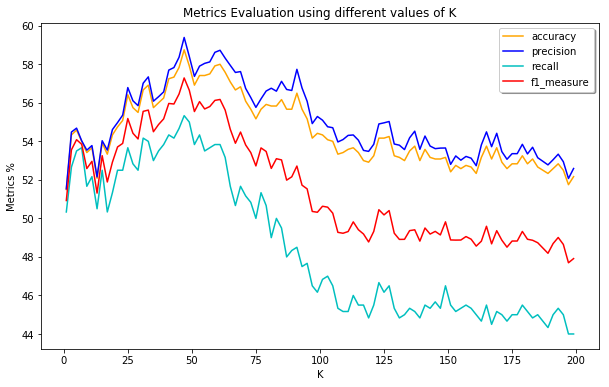


Maximum Accuracy: 58.75  with k = 47

Maximum Precision: 59.3917710197  with k = 47

Maximum Recall: 55.3333333333  with k = 47

Maximum F1 Measure: 57.2907679034  with k = 47


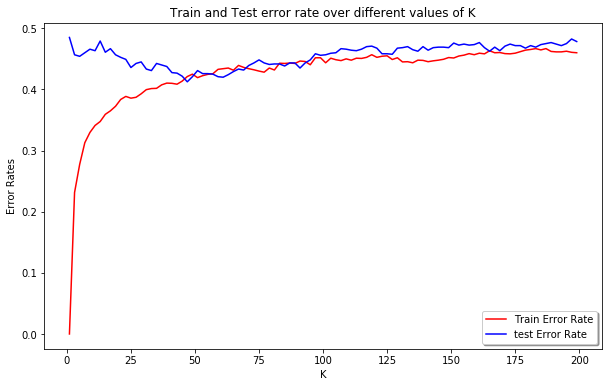


Minimum Test Error rate: 0.4125  with k = 47



In [13]:
c1_m1 = load_mean("hwk2_datasets_corrected/DS2_c1_m1.txt") # c1_m1 = 1 (20,)
c1_m2 = load_mean("hwk2_datasets_corrected/DS2_c1_m2.txt") # c1_m2 = 0.7 (20,)
c1_m3 = load_mean("hwk2_datasets_corrected/DS2_c1_m3.txt") # c1_m3 = 1.3 (20,)

c2_m1 = load_mean("hwk2_datasets_corrected/DS2_c2_m1.txt") # c2_m1 = 2.0 (20,)
c2_m2 = load_mean("hwk2_datasets_corrected/DS2_c2_m2.txt") # c2_m2 = 1.7 (20,)
c2_m3 = load_mean("hwk2_datasets_corrected/DS2_c2_m3.txt") # c2_m3 = 0.6 (20,)

cov1 = load_cov("hwk2_datasets_corrected/DS2_Cov1.txt")
cov2 = load_cov("hwk2_datasets_corrected/DS2_Cov2.txt")
cov3 = load_cov("hwk2_datasets_corrected/DS2_Cov3.txt")
c1_x = generate_data(c1_m1, c1_m2, c1_m3, cov1, cov2, cov3)
c2_x = generate_data(c2_m1, c2_m2, c2_m3, cov1, cov2, cov3)

d0, d1 = label_data(c1_x,c2_x)
test_data, train_data = divide_data(d0,d1)
save_data(train_data,test_data)    # Save traind and test data
test_data  = load_data("DS2.csv")   # load test data
train_data = load_data("DS2_train.csv") # load train data
train_data = shuffle_data(train_data)  # shuffle train data
test_data  = shuffle_data(test_data)  # shuffle test data

print "_____________________________ calculating LDA parameters________________________________"
mu1, mu2, cov, p_c1, p_c2 = LDA_parameters(c1_x, c2_x)
print "Mu1 = \n{}" .format(mu1)
print "Mu2 = \n{}" .format(mu2) 
print "Covariance = \n{}" .format(cov)
print "P_C1 = {}" .format(p_c1) 
print "P_C2 = {}" .format(p_c2)
print "_______________________________ calculating w and w0____________________________________"
w, w0 = LDA_model(mu1, mu2, cov, p_c1, p_c2)
print "W: \n{}" .format(w)
print "W0: \n{}" .format(w0)

print "______________________________LDA prediction for known data points______________________"
c1_labels = LDA_prediction(w,w0,c1_x) 
print "class 1 labels(Positive Class): \n{}" .format(c1_labels.sum())
c2_labels = LDA_prediction(w,w0,c2_x)
print "class 2 labels(Negative Class): \n{}" .format(c2_labels.sum())

print "_____________________________ Train Evaluation (LDA) ___________________________________"
train_predicted_y = LDA_prediction(w,w0,train_data[:,:20])
accuracy = get_accuracy(train_data[:,20],train_predicted_y)
print "\nAccuracy of train in LDA: \n{}%" .format(accuracy)

print "_________________________ classification Evaluation *** LDA *** ________________________"
test_predicted_y = LDA_prediction(w,w0,test_data[:,:20])
accuracy = get_accuracy(test_data[:,20],test_predicted_y)
print "\nAccuracy: {}%" .format(accuracy)
precision = get_precision(test_data[:,20],test_predicted_y)
print "\nPrecision: {}%" .format(precision)
recall = get_recall(test_data[:,20],test_predicted_y)
print "\nRecall: {}%" .format(recall)
f_measure = get_Fmeasure(precision, recall)
print "\nF1-measure: {}%" .format(f_measure)

print "_________________________ classification Evaluation *** KNN *** ________________________\n"

print "\n___________________________________Visualization_______________________________________\n"
visualize_metrics(train_data, test_data)
visualize_error_rate(train_data, test_data)
